# Introduction
This notebook aims to deliver a multi-step solution to the "Heart Disease" Kaggle Playground Series S6E2 challenge, involving Data Preprocessing, EDA, Feature Engineering, Model Selection, and Hyperparameter Tuning.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s6e2/sample_submission.csv
/kaggle/input/playground-series-s6e2/train.csv
/kaggle/input/playground-series-s6e2/test.csv


# 1) Data Preprocessing
First things first: let's load our data into a Pandas DataFrame. We're given a training set and a test set, and we're going to keep them separate throughout the solution. **Remember: test data is a biohazard! If it leaks, disaster ensues!**

## Training Set

In [1]:
train = pd.read_csv("/kaggle/input/playground-series-s6e2/train.csv", index_col = 'id')
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630000 entries, 0 to 629999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      630000 non-null  int64  
 1   Sex                      630000 non-null  int64  
 2   Chest pain type          630000 non-null  int64  
 3   BP                       630000 non-null  int64  
 4   Cholesterol              630000 non-null  int64  
 5   FBS over 120             630000 non-null  int64  
 6   EKG results              630000 non-null  int64  
 7   Max HR                   630000 non-null  int64  
 8   Exercise angina          630000 non-null  int64  
 9   ST depression            630000 non-null  float64
 10  Slope of ST              630000 non-null  int64  
 11  Number of vessels fluro  630000 non-null  int64  
 12  Thallium                 630000 non-null  int64  
 13  Heart Disease            630000 non-null  object 
dtypes: float6

From the output of  `train.info()`, we quickly observe that there are 630000 non-null rows, 12 integer columns, 1 float column, and 1 object column (which is our target column). Let's quickly confirm this with a quick look at the first five rows:

In [3]:
train.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
id,,,,,,,,,,,,,,
0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


We need to convert the 'Heart Disease' column into a machine-understandable form. We will accomplish this with label encoding because it appears to be binary.

In [4]:
from sklearn.preprocessing import LabelEncoder

data = train['Heart Disease']

le = LabelEncoder()
encoded_data = le.fit_transform(data)
train['Heart Disease'] = encoded_data
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 630000 entries, 0 to 629999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      630000 non-null  int64  
 1   Sex                      630000 non-null  int64  
 2   Chest pain type          630000 non-null  int64  
 3   BP                       630000 non-null  int64  
 4   Cholesterol              630000 non-null  int64  
 5   FBS over 120             630000 non-null  int64  
 6   EKG results              630000 non-null  int64  
 7   Max HR                   630000 non-null  int64  
 8   Exercise angina          630000 non-null  int64  
 9   ST depression            630000 non-null  float64
 10  Slope of ST              630000 non-null  int64  
 11  Number of vessels fluro  630000 non-null  int64  
 12  Thallium                 630000 non-null  int64  
 13  Heart Disease            630000 non-null  int64  
dtypes: float6

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
id,,,,,,,,,,,,,,
0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,1
1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,0
2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,0
3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,0
4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,1


We should also quickly check how many of our integer columns are continuous and how many are categorical.

In [2]:
for col in train.columns:
    print(col, train[col].nunique())

Age 42
Sex 2
Chest pain type 4
BP 66
Cholesterol 150
FBS over 120 2
EKG results 3
Max HR 93
Exercise angina 2
ST depression 66
Slope of ST 3
Number of vessels fluro 4
Thallium 3
Heart Disease 2


From the low cardinality, we can infer that 'Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro' and 'Thallium' are categorical integer columns.

While 'Age', 'BP', 'Cholesterol', 'Max HR', and 'ST depression' are continuous columns.

We'll make separate references to these two column types now. They'll be useful later.

In [3]:
cat_cols = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']
cont_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

And now let's get some basic statistical descriptions of our dataset:

In [4]:
train.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873
std,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000
75%,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


### Testing Set
Now let's do the same for our test set.

In [5]:
test = pd.read_csv("/kaggle/input/playground-series-s6e2/test.csv", index_col = 'id')
print(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 270000 entries, 630000 to 899999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      270000 non-null  int64  
 1   Sex                      270000 non-null  int64  
 2   Chest pain type          270000 non-null  int64  
 3   BP                       270000 non-null  int64  
 4   Cholesterol              270000 non-null  int64  
 5   FBS over 120             270000 non-null  int64  
 6   EKG results              270000 non-null  int64  
 7   Max HR                   270000 non-null  int64  
 8   Exercise angina          270000 non-null  int64  
 9   ST depression            270000 non-null  float64
 10  Slope of ST              270000 non-null  int64  
 11  Number of vessels fluro  270000 non-null  int64  
 12  Thallium                 270000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 28.8 MB
None


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
id,,,,,,,,,,,,,
630000,58,1,3,120,288,0,2,145,1,0.8,2,3,3
630001,55,0,2,120,209,0,0,172,0,0.0,1,0,3
630002,54,1,4,120,268,0,0,150,1,0.0,2,3,7
630003,44,0,3,112,177,0,0,168,0,0.9,1,0,3
630004,43,1,1,138,267,0,0,163,0,1.8,2,0,7


Here we have 270000 non-null rows and all columns (of course, aside from our target feature: Heart Disease).

In [6]:
test.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.00000,270000.000000
mean,54.159870,0.716315,3.315107,130.555089,245.045270,0.080052,0.978493,152.783756,0.274656,0.718082,1.459356,0.45480,4.619774
std,8.255471,0.450787,0.851762,15.007908,33.695458,0.271374,0.998686,19.153454,0.446341,0.947417,0.546186,0.80127,1.950273
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.00000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.00000,3.000000
50%,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.00000,3.000000
75%,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.00000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.00000,7.000000


Fortunately, here we don't have any null values to handle for either set.
## Drop Duplicate Entries

Here, we're going to drop duplicate rows from our training and test sets.

In [7]:
# Drop based only on feature columns
train = train.drop_duplicates()

test = test.drop_duplicates()

print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 630000 entries, 0 to 629999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      630000 non-null  int64  
 1   Sex                      630000 non-null  int64  
 2   Chest pain type          630000 non-null  int64  
 3   BP                       630000 non-null  int64  
 4   Cholesterol              630000 non-null  int64  
 5   FBS over 120             630000 non-null  int64  
 6   EKG results              630000 non-null  int64  
 7   Max HR                   630000 non-null  int64  
 8   Exercise angina          630000 non-null  int64  
 9   ST depression            630000 non-null  float64
 10  Slope of ST              630000 non-null  int64  
 11  Number of vessels fluro  630000 non-null  int64  
 12  Thallium                 630000 non-null  int64  
 13  Heart Disease            630000 non-null  object 
dtypes: float6

Looks like there were no duplicates, missing, or NaN values as the non-null counts have remained the same as the total number of rows.

# 2) Exploratory Data Analysis (EDA)
Now that we have clean data, we want to understand its nature: distributions of each feature, representations of each feature correlating to the target feature, correlations, etc. We will also produce many data visualizations here.

In [8]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA

sns.set(style='whitegrid', palette='muted', font_scale=1.1)

## X-y Split

In [9]:
# Now's a good time to split the training and target features
X_train = train.drop(columns=['Heart Disease'])
y_train = train['Heart Disease']

## Plot Target Distribution

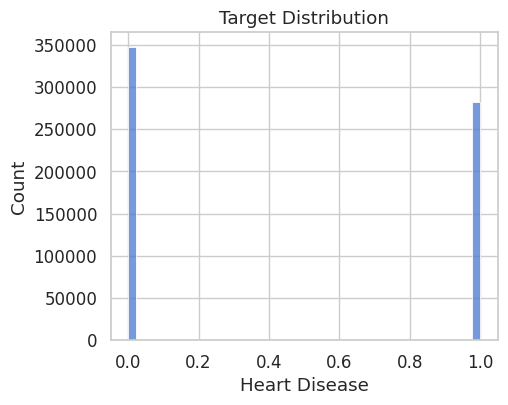

Heart Disease
0    0.55166
1    0.44834
Name: proportion, dtype: float64


In [13]:
# -------------------------------
# 1. Target distribution
# -------------------------------
plt.figure(figsize=(5,4))
sns.histplot(x=y_train)
plt.title('Target Distribution')
plt.show()
print(y_train.value_counts(normalize=True))

As expected, most of our patients do not have heart disease, but the split is roughly 55-45. 
This is a slight class imbalance that **we will have to address later**. Good to know!

## Continous Cols Univariate plots

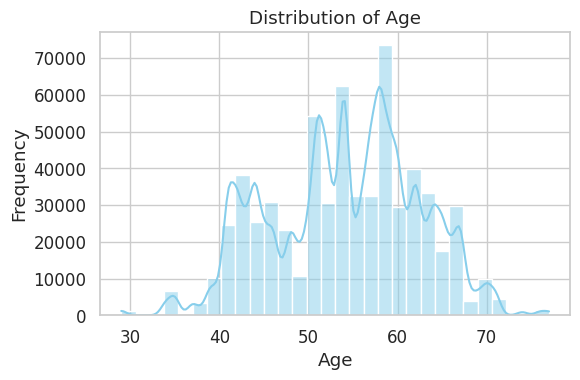

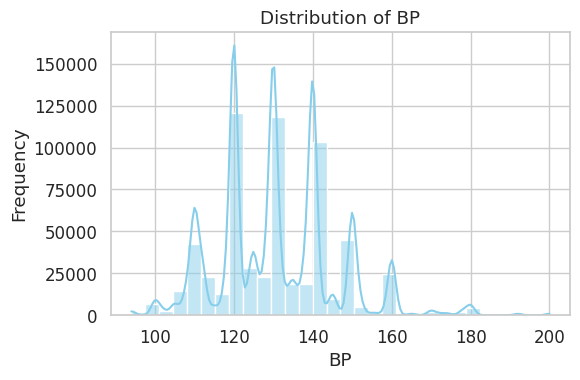

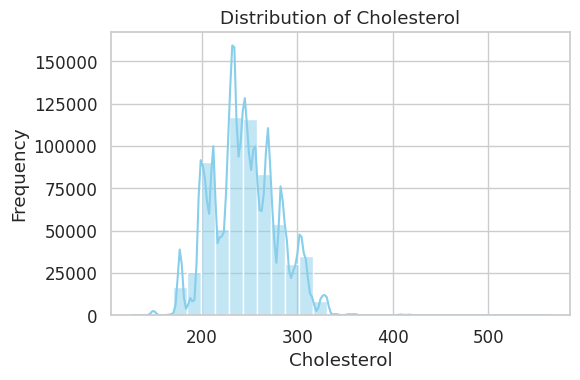

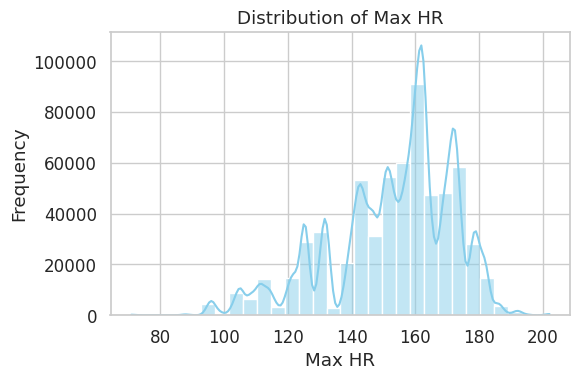

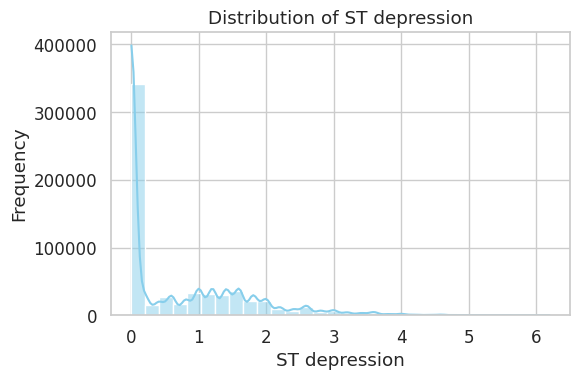

In [14]:
# -------------------------------
# 2a. Univariate feature distributions for continuous cols
# -------------------------------

for col in cont_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(x = X_train[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

### Inference
- 'Age', 'Cholesterol', and 'Max HR' all appear to follow Gaussian distributions.
- 'ST depression' has a spike at the start that tapers off sharply, indicating the latter half of a Gaussian with mode '0'. **An indicator/magnitude split feature based on whether ST depression is 0 or not is a key feature we can engineer in the latter step.**
- 'BP' has many spikes, clustered around '110', '120'... etc. in intervals of 10. We can confirm this with a quick sanity check:

In [22]:
X_train['BP'].value_counts().head(20)
X_train['BP'].diff().value_counts().head()

BP
 0.0     65882
-10.0    55730
 10.0    55715
-20.0    40135
 20.0    40101
Name: count, dtype: int64

Aha! This suggests a simple 'rounding' practice followed during 'BP' data collection, i.e. discretized clinical measurements.
- Overall, the feature is symmetrical-ish, and it's **best to leave it as-is for now.**
- **Potentially, we can create discrete features out of this feature (e.g. 'bp>=120', 'bp>=130' etc.)**, but we will see how the base models perform first.

## Categorical Cols Univariate plots

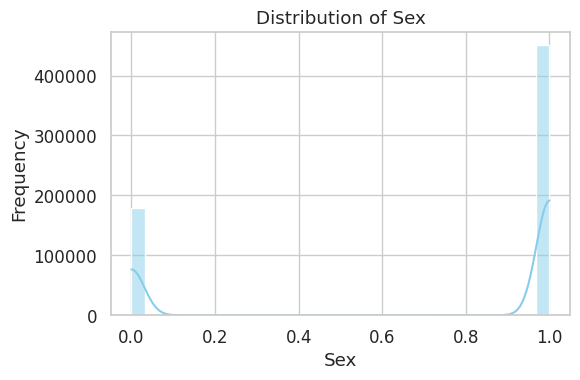

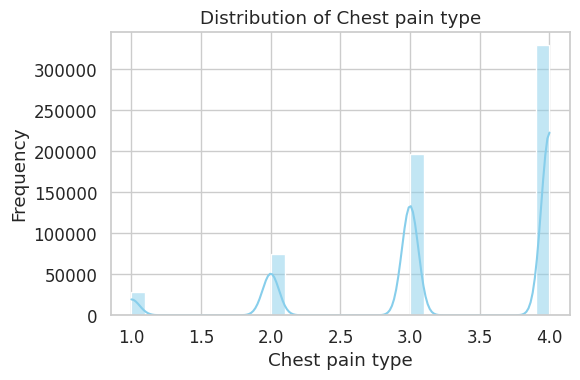

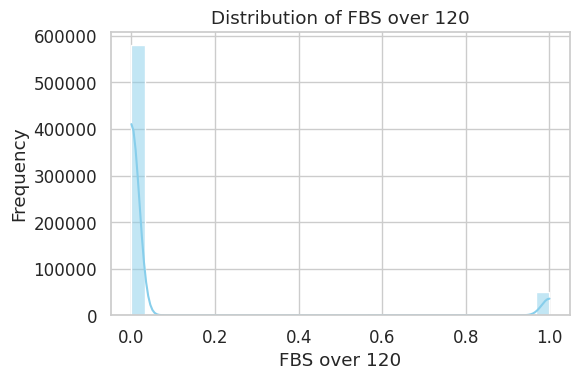

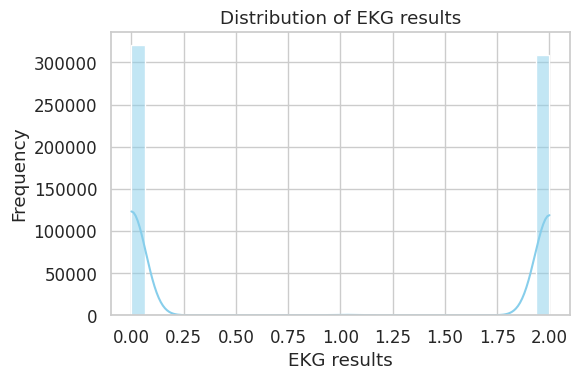

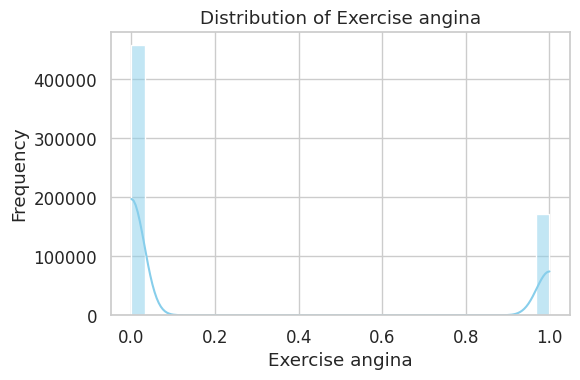

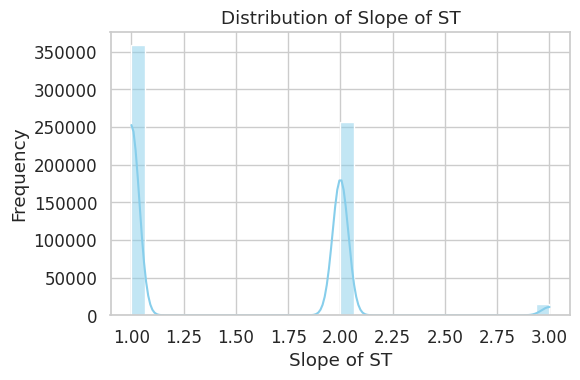

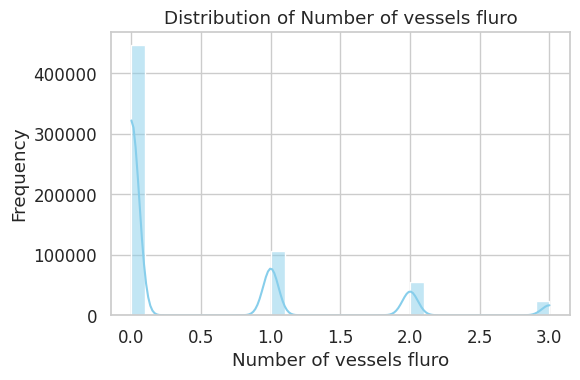

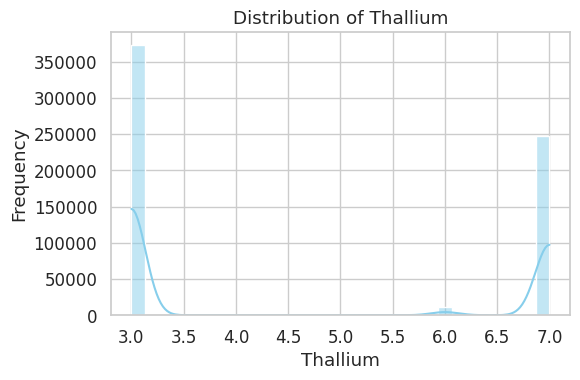

In [20]:
# -------------------------------
# 2b. Univariate feature distributions for categorical cols
# -------------------------------

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(x = X_train[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

### Inference
- **Sex:** There are significantly more instances of sex '1' than '0'. In a totally random sampling, the split is expected to be closer to 50-50. Maybe there is a sampling bias in our data.
- **Thallium:** There are a few values of '6' compared to '3' and '7'.
- Since we have so many categorical columns, **a tree-based model would perform quite well here.**

## Bivariate plots

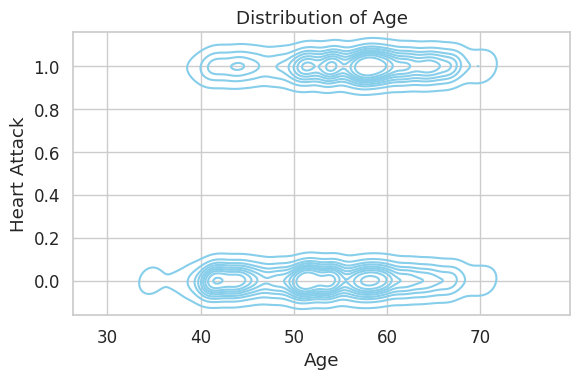

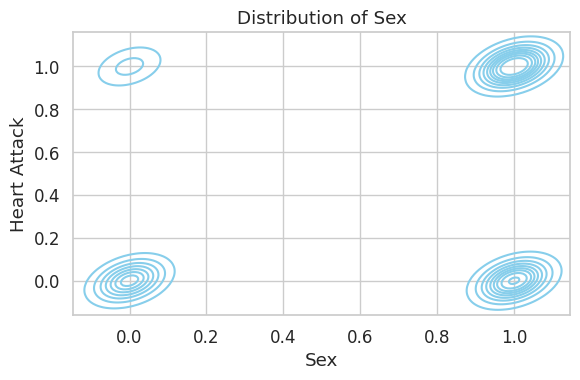

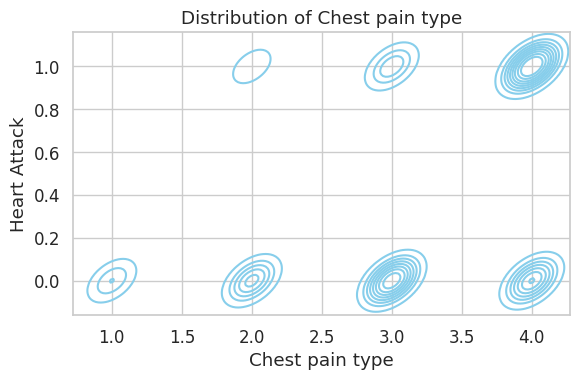

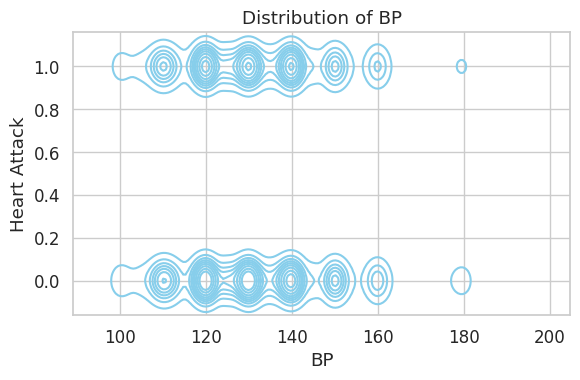

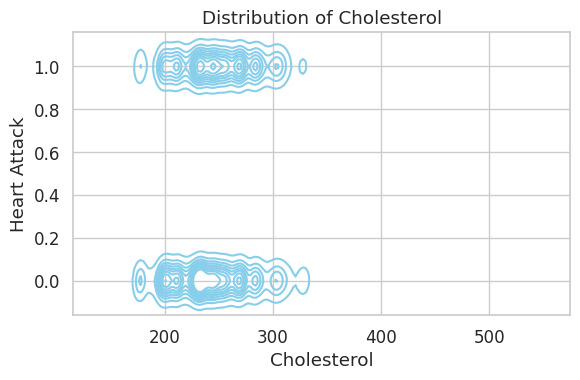

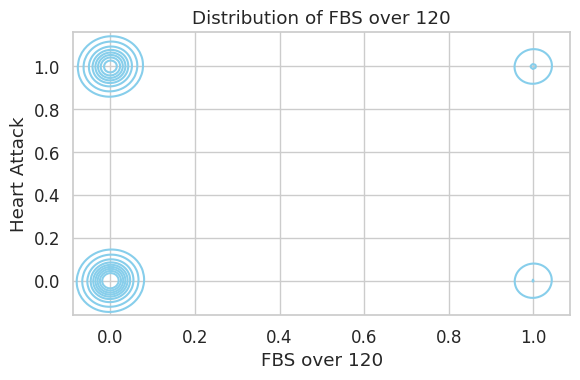

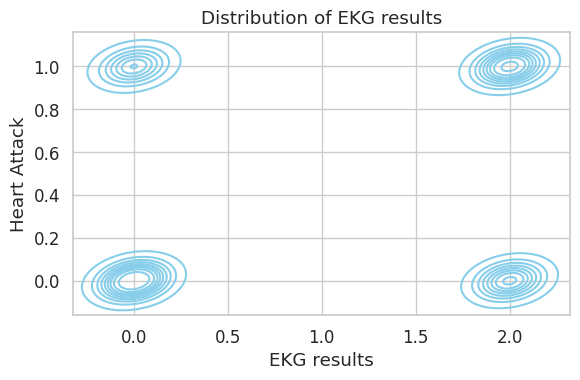

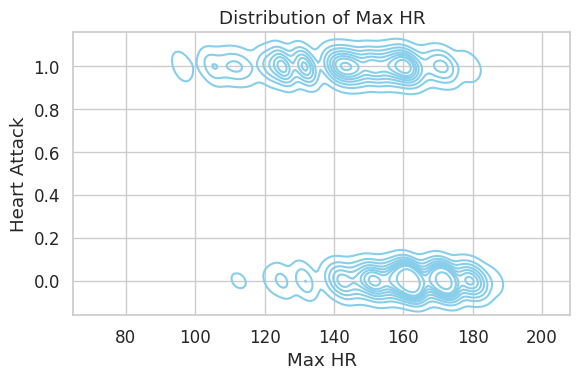

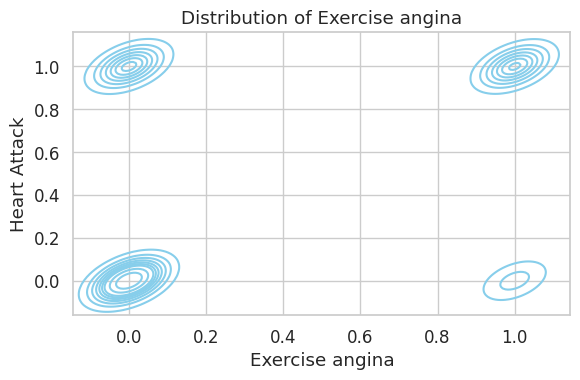

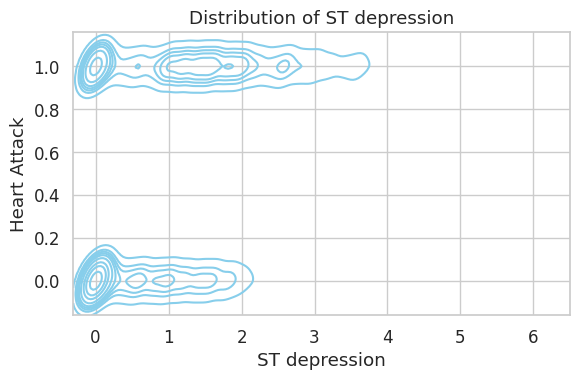

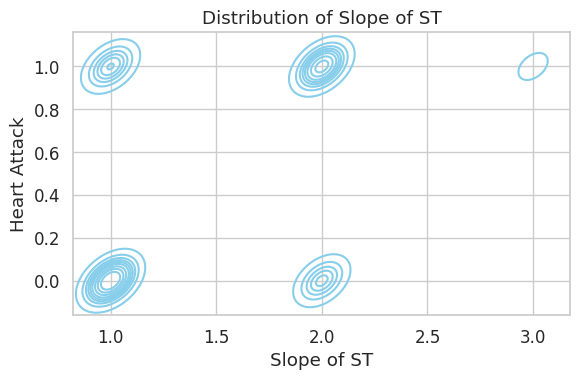

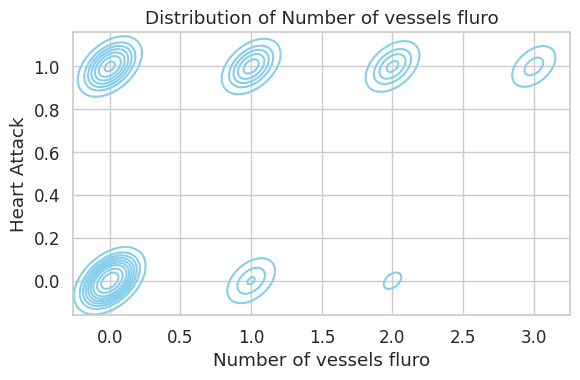

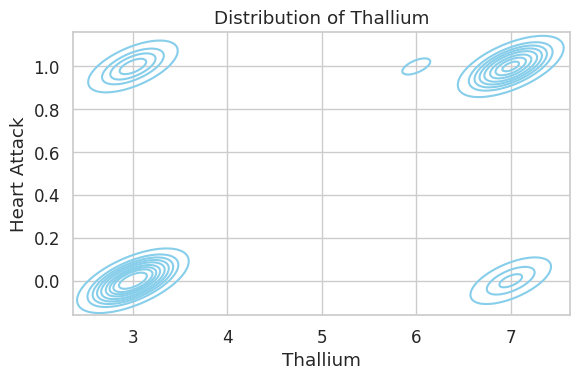

In [25]:
# -------------------------------
# 3. Bivariate distributions w.r.t. target
# -------------------------------

for col in X_train.columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(x = X_train[col], y = y_train, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Heart Attack")
    plt.tight_layout()
    plt.show()

## Cardinality Check

In [14]:
for col in cat_cols:
    print(col, X_train[col].nunique())

Sex 2
Chest pain type 4
FBS over 120 2
EKG results 3
Exercise angina 2
Slope of ST 3
Number of vessels fluro 4
Thallium 3


Our categorical features are low in cardinality (number of unique values) and we know that they are already numerically encoded, so we do not have to consider special handling or encoding cases.

## Feature redundancy and dependence

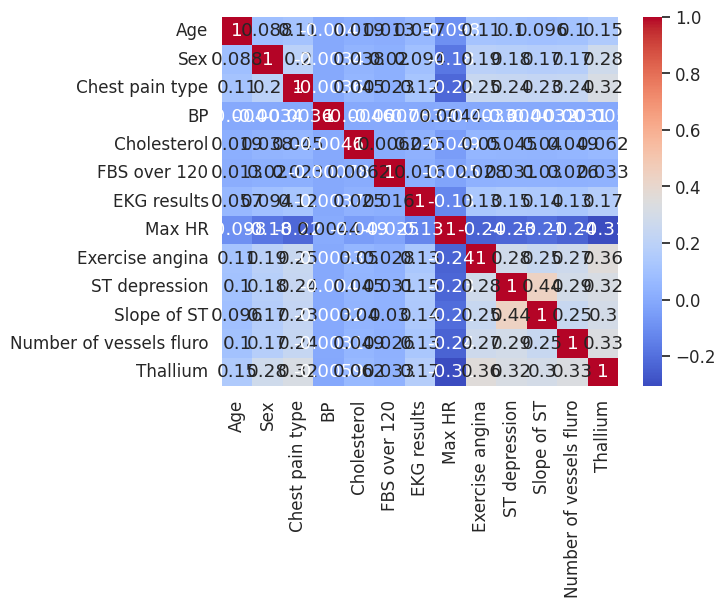

[ 0.21209131  0.34244626  0.4606836  -0.00518103  0.08275283  0.03357028
  0.21896133 -0.44098542  0.44186373  0.43064059  0.41505024  0.43860354
  0.60577639]


In [14]:
# -------------------------------
# 4. Feature correlation
# -------------------------------
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Feature vs target correlation
correlations = np.corrcoef(X_train.values.T, y_train.values)[-1,:-1]
print(correlations)

### Inference
- It seems that while Thallium is highly correlated with Heart Disease, no other feature is.
- More importantly, it also seems that no feature is highly correlated with each other, which is a good thing.

We can verify this quickly with Mutual Information.

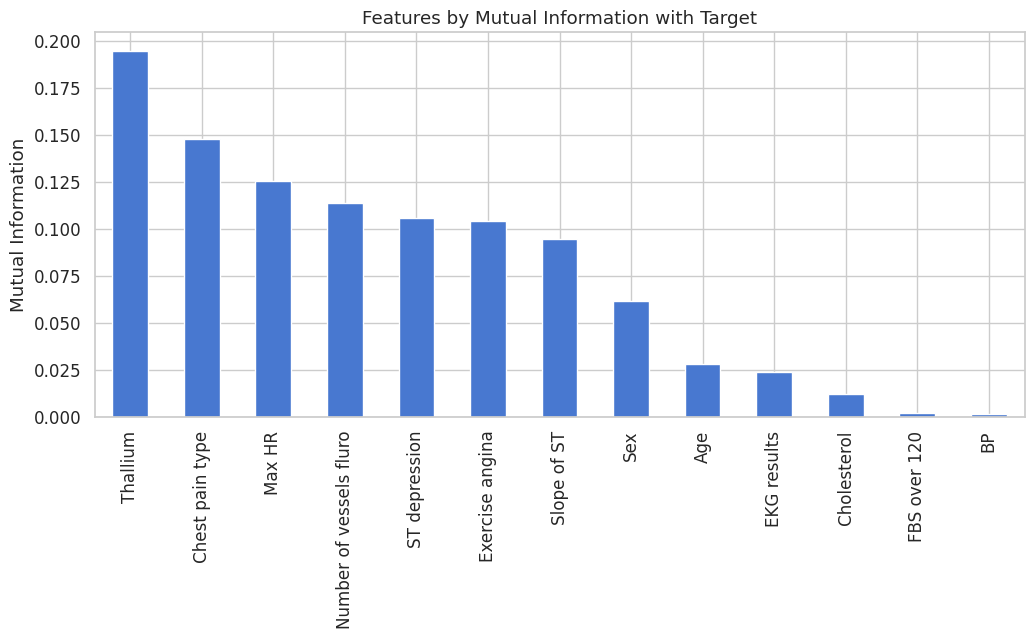

In [16]:
# -------------------------------
# 5. Mutual Information
# -------------------------------
mi = mutual_info_regression(X_train, y_train, discrete_features=False, random_state=42)
mi_series = pd.Series(mi, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12,5)) 
mi_series.plot(kind='bar')
plt.title('Features by Mutual Information with Target')
plt.ylabel('Mutual Information')
plt.show()

# 3) Feature Engineering

## Indicator/Magnitude split for 'ST depression'

In [10]:
X_train_proc = X_train.copy()

X_train_proc['st_dep_present'] = (X_train_proc['ST depression'] > 0).astype(int)
X_train_proc['st_dep_value'] = X_train_proc['ST depression']

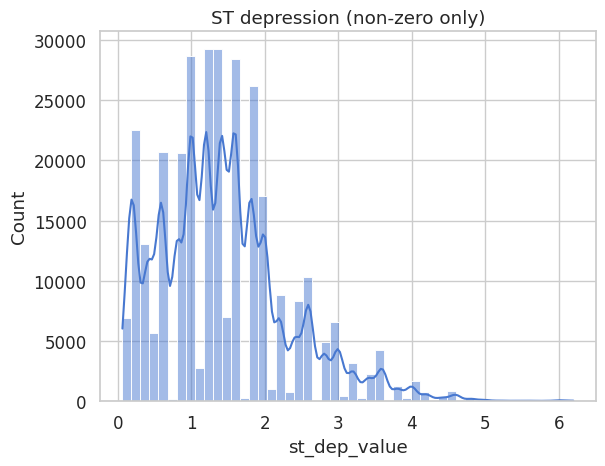

count    315061.000000
mean          1.431778
std           0.879803
min           0.060000
25%           0.800000
50%           1.400000
75%           1.800000
max           6.200000
Name: st_dep_value, dtype: float64
Skew:  0.8879521923821923


In [11]:
non_zero = X_train_proc.loc[X_train_proc['st_dep_value'] > 0, 'st_dep_value']
sns.histplot(non_zero, bins=50, kde=True)
plt.title('ST depression (non-zero only)')
plt.show()
print(non_zero.describe())
print("Skew: ", non_zero.skew())

As we can see, the non-zero values of st-dep follow a log-normal distribution. However, this is clinically meaningful data, so we should not just log-transform it. Also as noted earlier, a tree-based model would be good here, and trees are invariant to monotonic transformations.

We can now drop the original ST_depression column because it is redundant.

In [13]:
X_train_proc = X_train_proc.drop(columns=['ST depression'])

In [14]:
X_train_proc.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,Slope of ST,Number of vessels fluro,Thallium,st_dep_present,st_dep_value
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,1.455871,0.451040,4.618873,0.500097,0.716028
std,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.545192,0.798549,1.950007,0.500000,0.948472
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.100000
75%,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,2.000000,1.000000,7.000000,1.000000,1.400000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,3.000000,3.000000,7.000000,1.000000,6.200000
